###  SIMPLE LINEAR REGRESSION (Auto.csv)

#### importing libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

#### getting data set

In [18]:
df = pd.read_csv('datasets/Auto.csv')
cols = df.columns[:-1]
X = df.iloc[:,3].values
y = df.iloc[:,0].values
#horsepower is stored as string and also with missing values as '?'
#so first, we replace the missing values and then convert them into int
#we can then replace those changed missing values to the mean of the now numeric x
X = np.where(X == '?', 0, X)
X = X.astype(np.int)
X = np.where(X == 0, np.mean(X).round(2), X)


#### splitting dataset into training and test sets (80/20)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

#### training SLR model on the training set

In [22]:
from sklearn.linear_model import LinearRegression

def trainModel(x, y, regressor):
    x = x.reshape(-1, 1)
    regressor.fit(x, y)
    B0 = regressor.intercept_
    B1 = regressor.coef_
    print("intercept for horsepower: {}".format(B0))
    print("coefficient for horsepower: {}".format(B1))
    return (B0, B1)
    
    

In [23]:
regressor = LinearRegression()
B0, B1 = trainModel(X_train, y_train, regressor)


intercept for horsepower: 40.674357228870946
coefficient for horsepower: [-0.1628264]


#### using model to predict for test set

In [24]:
x = X_test.reshape(-1, 1).round(2)
y_pred = regressor.predict(x).round(2)

#### calculating accuracy using R^2

In [25]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train.reshape(-1,1))).round(4)
r2_test = r2_score(y_test, y_pred).round(4)
print(r2_test)
print(r2_train)

0.4943
0.6154


#### Visualising train dataset

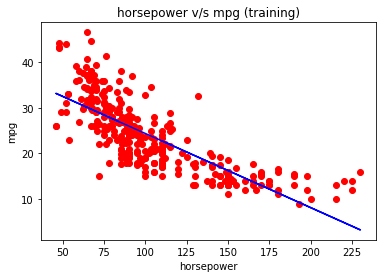

In [27]:

plt.scatter(X_train , y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color='blue')
plt.title('horsepower v/s mpg (training)')
plt.xlabel('horsepower')
plt.ylabel("mpg")
plt.show()

#### visualising test set

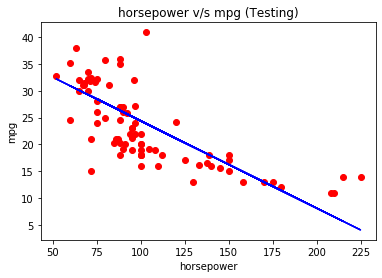

In [28]:

plt.scatter(X_test , y_test, color = 'red')
plt.plot(X_test, y_pred, color='blue')
plt.title('horsepower v/s mpg (Testing)')
plt.xlabel('horsepower')
plt.ylabel("mpg")
plt.show()

#### calculating the residual

In [32]:
residual = (y_pred - y_test).round(4)
residual_sq = residual**2
RSS = sum(residual_sq)
print(RSS)

2127.797600000001
